
# Use MAPIE to plot prediction intervals
An example plot of :class:`~mapie.regression.SplitConformalRegressor` used
in the Quickstart.


We will use MAPIE to estimate prediction intervals on a one-dimensional,
non-linear regression problem.



In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.typing import NDArray
from sklearn.neural_network import MLPRegressor
from mapie.metrics.regression import regression_coverage_score
from mapie.regression import SplitConformalRegressor
from mapie.utils import train_conformalize_test_split

RANDOM_STATE = 1

Firstly, let us create our dataset:



In [14]:
#Dataset Creation 
dfwine= pd.read_csv("wine.csv")
alcohol = dfwine.pop("Alcohol")
#### splitting train and test set
X= dfwine
y = alcohol
(X_train, X_conformalize, X_test, y_train, y_conformalize, y_test) = (
    train_conformalize_test_split(
        X,
        y,
        train_size=0.8,
        conformalize_size=0.1,
        test_size=0.1,
        random_state=RANDOM_STATE,
    )
)

We fit our training data with a MLPRegressor.
Then, we initialize a :class:`~mapie.regression.SplitConformalRegressor`
using our estimator, indicating that it has already been fitted with
`prefit=True`.
Lastly, we compute the prediction intervals with the desired confidence level using
the ``conformalize`` and ``predict_interval`` methods.



In [17]:
regressor = MLPRegressor(activation="relu", random_state=RANDOM_STATE)
regressor.fit(X_train, y_train)

confidence_level = 0.90
mapie_regressor = SplitConformalRegressor(
    estimator=regressor, confidence_level=confidence_level, prefit=True
)
mapie_regressor.conformalize(X_conformalize, y_conformalize)
y_pred, y_pred_interval = mapie_regressor.predict_interval(X_test)

c:\Users\melan\anaconda3\envs\ML2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


``y_pred`` represents the point predictions as a ``np.ndarray`` of shape
``(n_samples)``.
``y_pred_interval`` corresponds to the prediction intervals as a ``np.ndarray`` of
shape ``(n_samples, 2, 1)``, giving the lower and upper bounds of the intervals.



Finally, we can easily compute the coverage score (i.e., the proportion of times the
true labels fall within the predicted intervals).



In [18]:
coverage_score = regression_coverage_score(y_test, y_pred_interval)
print(
    f"For a confidence level of {confidence_level:.2f}, "
    f"the target coverage is {confidence_level:.3f}, "
    f"and the effective coverage is {coverage_score[0]:.3f}."
)

For a confidence level of 0.90, the target coverage is 0.900, and the effective coverage is 1.000.


In this example, the effective coverage is slightly above the target coverage
(i.e., 0.95), indicating that the confidence level we set has been reached.
Therefore, we can confirm that the prediction intervals effectively contain the
true label more than 95% of the time.



Now, let us plot the estimated prediction intervals.



ValueError: x and y must be the same size

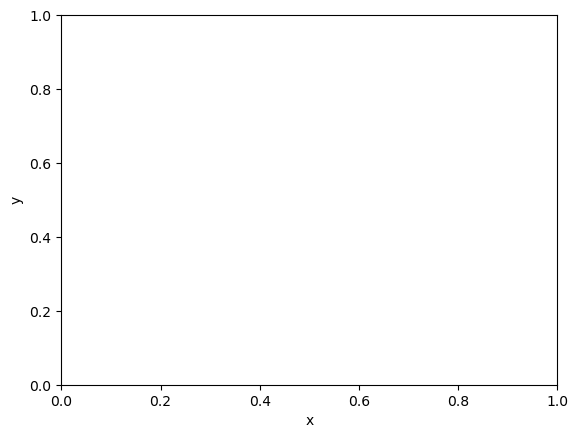

In [19]:
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X_test, y_test, alpha=0.3)
X_test = X_test.ravel()
order = np.argsort(X_test)
plt.plot(X_test[order], y_pred[order], color="C1")
plt.plot(X_test[order], y_pred_interval[order][:, 0, 0], color="C1", ls="--")
plt.plot(X_test[order], y_pred_interval[order][:, 1, 0], color="C1", ls="--")
plt.fill_between(
    X_test[order],
    y_pred_interval[:, 0, 0][order].ravel(),
    y_pred_interval[:, 1, 0][order].ravel(),
    alpha=0.2,
)
plt.title("Estimated prediction intervals with MLPRegressor")
plt.show()

On the plot above, the dots represent the samples from our dataset, while the
orange area corresponds to the estimated prediction intervals for each ``x`` value.

